Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("C:\Users\Lenovo\OneDrive\Desktop\Banu Docs\laptop_cleaned2.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/colab /Sales Prediction Model/laptop_cleaned2.csv'

In [4]:
df

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,...,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,...,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1015,MSI Creator Z17 HX Studio A13V Laptop,MSI,247999,4.45,Intel,Intel Core i9,13900H,13.0,14.0,...,NVIDIA GeForce RTX 4070,NVIDIA,8.0,False,17.0,2560,1600,177.58,False,Windows 11 OS
1016,1016,MSI Stealth 16 Mercedes AMG Motorsport A13V Ga...,MSI,292990,4.20,Intel,Intel Core i9,13900H,13.0,14.0,...,NVIDIA GeForce RTX 4070,NVIDIA,8.0,False,16.0,3840,2400,283.02,False,Windows 11 OS
1017,1017,HP Victus 15-fb0131AX Gaming Laptop (AMD Ryzen...,HP,58800,4.40,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 5600M,AMD,4.0,False,15.6,1920,1080,141.21,False,Windows 11 OS
1018,1018,Asus Vivobook 16 2023 M1605YA-MB521WS Laptop (...,Asus,54999,4.25,AMD,AMD Ryzen 5,7530U,7.0,6.0,...,AMD Radeon AMD,AMD,NaN,False,16.0,1920,1200,141.51,False,Windows 11 OS


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
Rating,0
Processor_brand,0
Processor_name,0
Processor_variant,24
Processor_gen,129
Core_per_processor,12
Total_processor,447


In [7]:
df.shape

(1020, 28)

In [8]:
df["Name"][555]

'HP 15s-fq5111TU Laptop (12th Gen Core i5/ 8GB/ 512GB SSD/ Win11 Home)'

Feature Selections

In [9]:
df.drop(["Graphics_GB","Total_processor","Execution_units","Processor_gen"],axis=1,inplace=True)

In [10]:
df.shape

(1020, 24)

Storing columns with datatype as object


In [11]:
obj_col = df.select_dtypes(include="object").columns

In [12]:
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
Rating,0
Processor_brand,0
Processor_name,0
Processor_variant,24
Core_per_processor,12
Low_Power_Cores,0
Energy_Efficient_Units,0


In [13]:
null_col = df.columns[df.isnull().any()].tolist()

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
col = list(df.columns)

In [16]:
df.dtypes

,0
Name,object
Brand,object
Price,int64
Rating,float64
Processor_brand,object
Processor_name,object
Processor_variant,object
Core_per_processor,float64
Low_Power_Cores,float64
Energy_Efficient_Units,int64


Using Simple Imputer to fill the null values and managing also the datatype

In [17]:
null_col

['Processor_variant',
 'Core_per_processor',
 'Threads',
 'RAM_type',
 'Graphics_name',
 'Graphics_brand',
 'Graphics_integreted']

In [18]:
si = SimpleImputer(strategy="most_frequent")

In [19]:
float_null = list(df[null_col].select_dtypes(exclude="object"))

In [20]:
df_si = si.fit_transform(df[null_col])

In [21]:
df_si.shape

(1020, 7)

In [22]:
df_si=pd.DataFrame(df_si,columns=null_col)

In [23]:
for i in float_null:
  df_si[i]=df_si[i].astype('float64')

In [24]:
df_si.dtypes

,0
Processor_variant,object
Core_per_processor,float64
Threads,float64
RAM_type,object
Graphics_name,object
Graphics_brand,object
Graphics_integreted,object


In [25]:
for i in null_col:
  df[i] = df_si[i]

In [26]:
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
Rating,0
Processor_brand,0
Processor_name,0
Processor_variant,0
Core_per_processor,0
Low_Power_Cores,0
Energy_Efficient_Units,0


In [27]:
df.dtypes

,0
Name,object
Brand,object
Price,int64
Rating,float64
Processor_brand,object
Processor_name,object
Processor_variant,object
Core_per_processor,float64
Low_Power_Cores,float64
Energy_Efficient_Units,int64


Generating a dummy column i.e Sales_vol(Target Column)

In [28]:
np.random.seed(42)
df["Sales_vol"] = (1000 / (df["Price"] + 1)) * (1 + df["Rating"] / 5)+np.random.randint(0,2)

<Axes: xlabel='Sales_vol', ylabel='Count'>

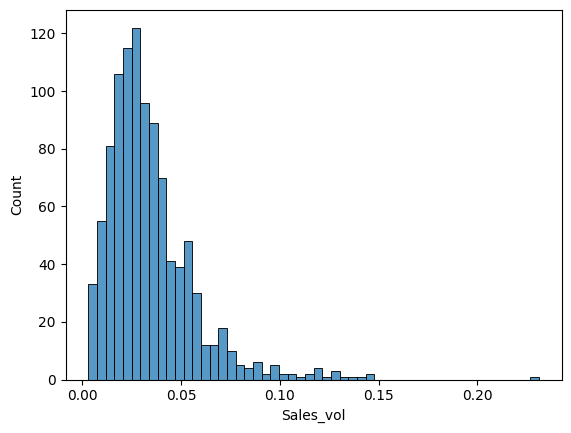

In [29]:
sns.histplot(df["Sales_vol"])

In [30]:
# sns.heatmap(df[list(df.dtypes(exclude="object"))].corr(),annot=True)

In [31]:
Y = df["Sales_vol"]
X = df.drop("Sales_vol",axis=1)

Converting Categorical column to numerical using One Hot Encoding

In [32]:
ohe = OneHotEncoder(sparse_output=False)

In [33]:
list(X.select_dtypes(include="float").columns)

['Rating',
 'Core_per_processor',
 'Low_Power_Cores',
 'Threads',
 'Display_size_inches',
 'ppi']

In [34]:
col = list(X.select_dtypes(include="object").columns)
float_columns = list(X.select_dtypes(include="float").columns)

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), col),
        ('num', 'passthrough', float_columns)
    ]
)

In [36]:
transformed_data = preprocessor.fit_transform(df)


In [37]:
list(X.select_dtypes(exclude="object").columns)

['Price',
 'Rating',
 'Core_per_processor',
 'Low_Power_Cores',
 'Energy_Efficient_Units',
 'Threads',
 'RAM_GB',
 'Storage_capacity_GB',
 'Display_size_inches',
 'Horizontal_pixel',
 'Vertical_pixel',
 'ppi',
 'Touch_screen']

In [38]:
df.dtypes

,0
Name,object
Brand,object
Price,int64
Rating,float64
Processor_brand,object
Processor_name,object
Processor_variant,object
Core_per_processor,float64
Low_Power_Cores,float64
Energy_Efficient_Units,int64


In [39]:
transformed_data

array([[  0.  ,   0.  ,   0.  , ...,  12.  ,  15.6 , 141.21],
       [  0.  ,   0.  ,   0.  , ...,   8.  ,  15.6 , 141.21],
       [  0.  ,   0.  ,   0.  , ...,   8.  ,  15.6 , 141.21],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  12.  ,  15.6 , 141.21],
       [  0.  ,   0.  ,   0.  , ...,  12.  ,  16.  , 141.51],
       [  0.  ,   0.  ,   0.  , ...,  12.  ,  16.  , 141.51]])

Splitting the dataset into train and test

In [40]:
x_train,x_test,y_train,y_test = train_test_split(transformed_data,Y,test_size=0.2,random_state=42)

Using XGBRegressor to train the model , Setting early stopping to prevent overfitting

In [41]:
model = XGBRegressor(n_estimators=1000, early_stopping_rounds=10)
model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = model.predict(x_test)

Checking the accuracy of the model using root mean square

In [43]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

Checking for overfitting by comparing the accuracy on x_train and x_test

In [44]:
print("RMSE:", rmse)


RMSE: 0.008524002989227694


In [45]:
np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

0.003672159751051342

In [46]:
company = []
for i in range(df.shape[0]):
    company.append(df["Name"][i].split()[0])


In [47]:
company = pd.DataFrame(company)

In [48]:
df['Brand'] = company[0]

In [49]:
df

,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Core_per_processor,Low_Power_Cores,Energy_Efficient_Units,...,Graphics_name,Graphics_brand,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system,Sales_vol
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,6.0,0.0,0,...,AMD Radeon RX 6500M,AMD,False,15.6,1920,1080,141.21,True,Windows 11 OS,0.036905
1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,4.0,0.0,0,...,AMD Radeon Graphics,AMD,False,15.6,1920,1080,141.21,False,Windows 11 OS,0.070810
2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,6.0,0.0,0,...,Intel UHD Graphics,Intel,False,15.6,1920,1080,141.21,False,Windows 11 OS,0.052144
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,0.0,0,...,Intel Iris Xe Graphics,Intel,False,13.3,1080,1920,165.63,False,Windows 11 OS,0.027861
4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,2.0,0.0,0,...,Intel UHD Graphics,Intel,False,15.6,1920,1080,141.21,False,Windows 11 OS,0.077112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,MSI Creator Z17 HX Studio A13V Laptop,MSI,247999,4.45,Intel,Intel Core i9,13900H,14.0,0.0,0,...,NVIDIA GeForce RTX 4070,NVIDIA,False,17.0,2560,1600,177.58,False,Windows 11 OS,0.007621
1016,MSI Stealth 16 Mercedes AMG Motorsport A13V Ga...,MSI,292990,4.20,Intel,Intel Core i9,13900H,14.0,0.0,0,...,NVIDIA GeForce RTX 4070,NVIDIA,False,16.0,3840,2400,283.02,False,Windows 11 OS,0.006280
1017,HP Victus 15-fb0131AX Gaming Laptop (AMD Ryzen...,HP,58800,4.40,AMD,AMD Ryzen 5,5600H,6.0,0.0,0,...,AMD Radeon RX 5600M,AMD,False,15.6,1920,1080,141.21,False,Windows 11 OS,0.031972
1018,Asus Vivobook 16 2023 M1605YA-MB521WS Laptop (...,Asus,54999,4.25,AMD,AMD Ryzen 5,7530U,6.0,0.0,0,...,AMD Radeon AMD,AMD,False,16.0,1920,1200,141.51,False,Windows 11 OS,0.033636


Visualizing the data by interactive plots

Graph between Brand and Sales_vol


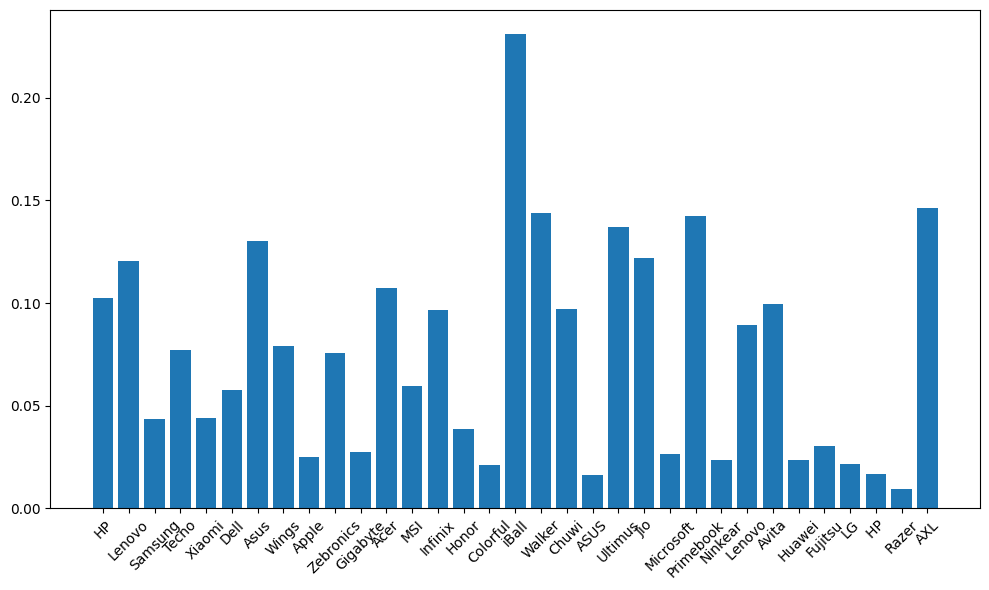

In [50]:

plt.figure(figsize=(10, 6))

plt.bar(df['Brand'], df['Sales_vol'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

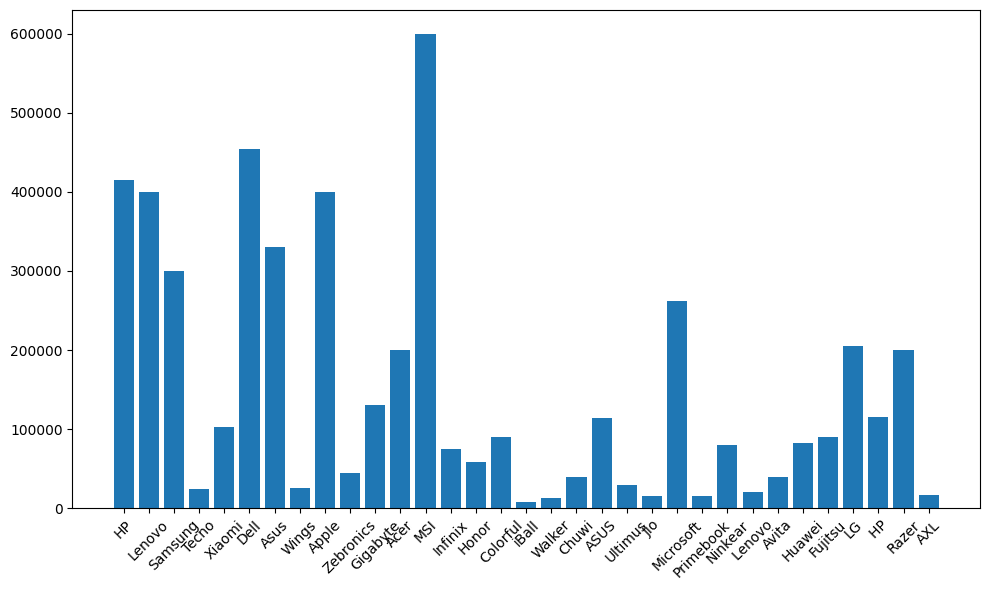

In [51]:

plt.figure(figsize=(10, 6))

plt.bar(df['Brand'], df['Price'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

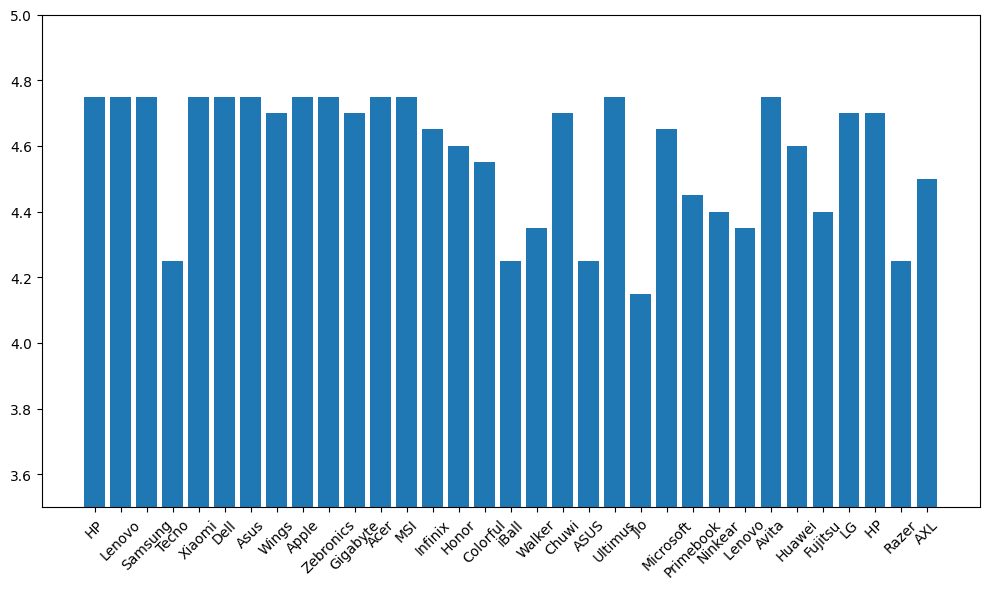

In [52]:

plt.figure(figsize=(10, 6))
plt.ylim(3.5, 5)
plt.bar(df['Brand'], df['Rating'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()